In [61]:
import numpy as np
import pandas as pd

from sklearn.metrics import root_mean_squared_error

import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("ts_passangers.csv")

In [35]:
df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [36]:
df.columns = ["ds", "y"]

In [37]:
df.head(5)

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [39]:
df["ds"] = pd.to_datetime(df["ds"], format="%Y-%m")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [48]:
df.set_index("ds", inplace=True)

In [49]:
df["y_log"] = np.log(df["y"])
df["y_log_diff"] = df["y_log"].diff()
df.head()

,y,y_log,y_log_diff
ds,,,
1949-01-01,112,4.718499,NaN
1949-02-01,118,4.770685,0.052186
1949-03-01,132,4.882802,0.112117
1949-04-01,129,4.859812,-0.022990
1949-05-01,121,4.795791,-0.064022


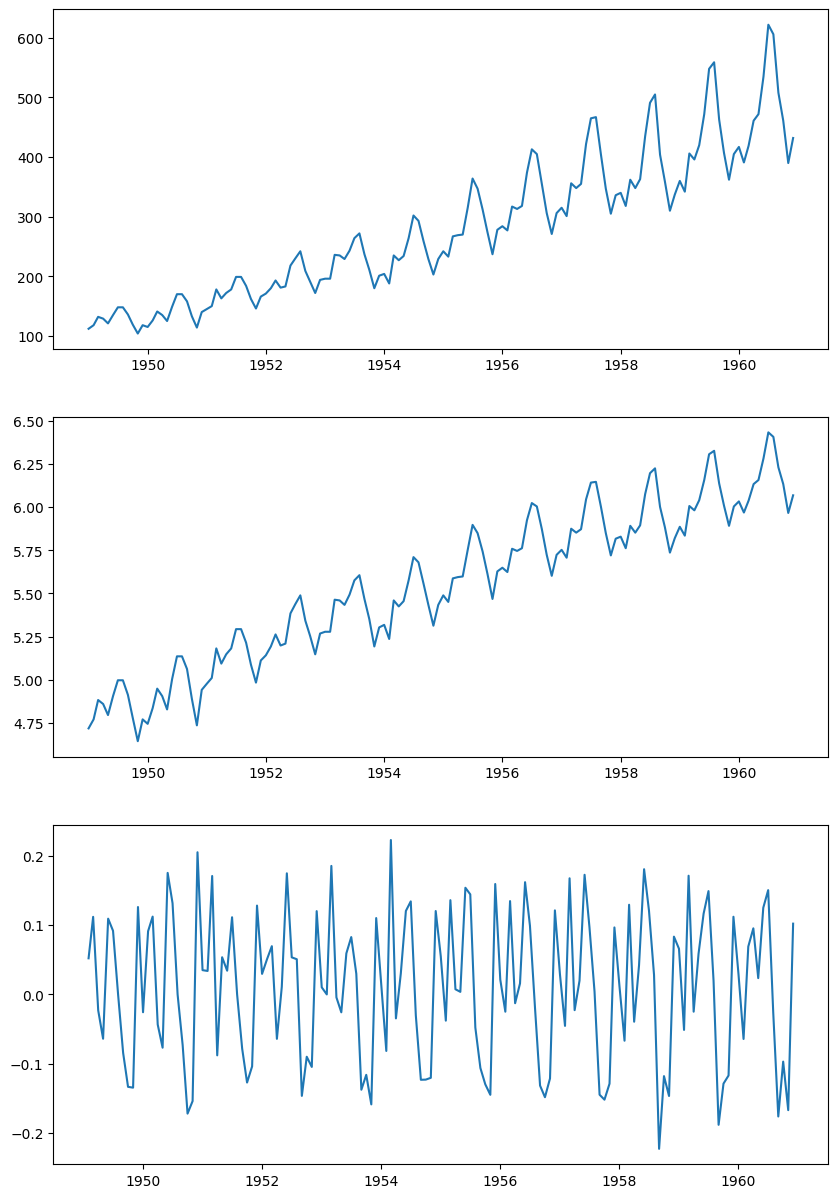

In [51]:
fig = plt.figure(figsize=(10, 15))
ax1, ax2, ax3 = fig.subplots(3, 1)

ax1.plot(df["y"])
ax2.plot(df["y_log"])
ax3.plot(df["y_log_diff"])

In [63]:
df["y_log_diff_mean"] = df["y_log_diff"].mean()
df["y_error_mean"] = df["y_log_diff"] - df["y_log_diff_mean"]

In [64]:
df.head()

,y,y_log,y_log_diff,y_log_diff_mean,y_error_mean
ds,,,,,
1949-01-01,112,4.718499,NaN,0.00944,NaN
1949-02-01,118,4.770685,0.052186,0.00944,0.042746
1949-03-01,132,4.882802,0.112117,0.00944,0.102677
1949-04-01,129,4.859812,-0.022990,0.00944,-0.032430
1949-05-01,121,4.795791,-0.064022,0.00944,-0.073462


In [66]:
root_mean_squared_error(
    y_true=df["y_log_diff"].dropna(), y_pred=df["y_log_diff_mean"].iloc[1:]
)

0.10618291994692682

<Axes: xlabel='ds'>

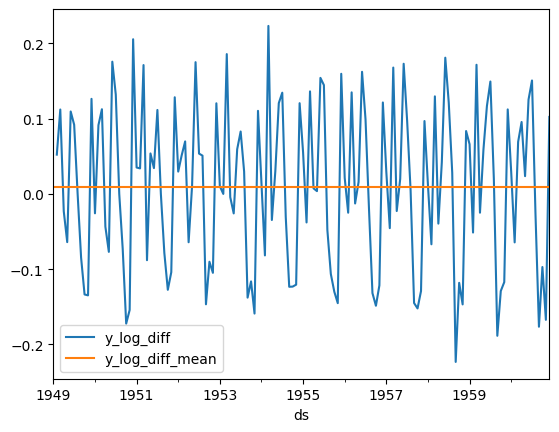

In [58]:
(df[["y_log_diff", "y_log_diff_mean"]].plot())